# Sales-Prediction-Using-Python

In [8]:
#imports
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Data Collection and Cleaning

In [8]:
df= pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
df.shape

(200, 4)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [16]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Data Visualization

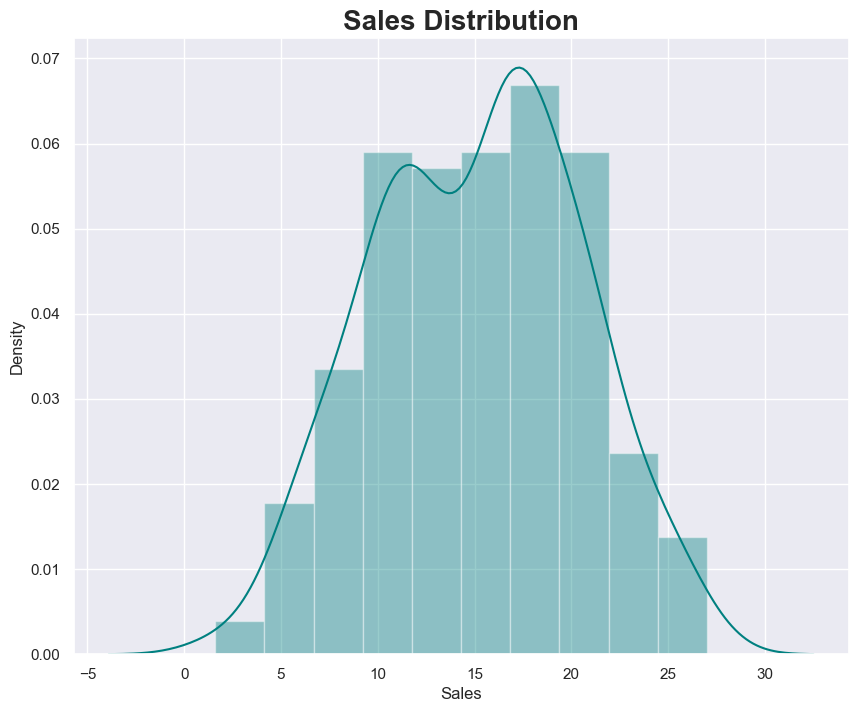

In [18]:
sns.set()
plt.figure(figsize=(10,8))
sns.distplot(df['Sales'],color='Teal')
plt.title("Sales Distribution",fontsize=20,fontweight='bold')
plt.show()

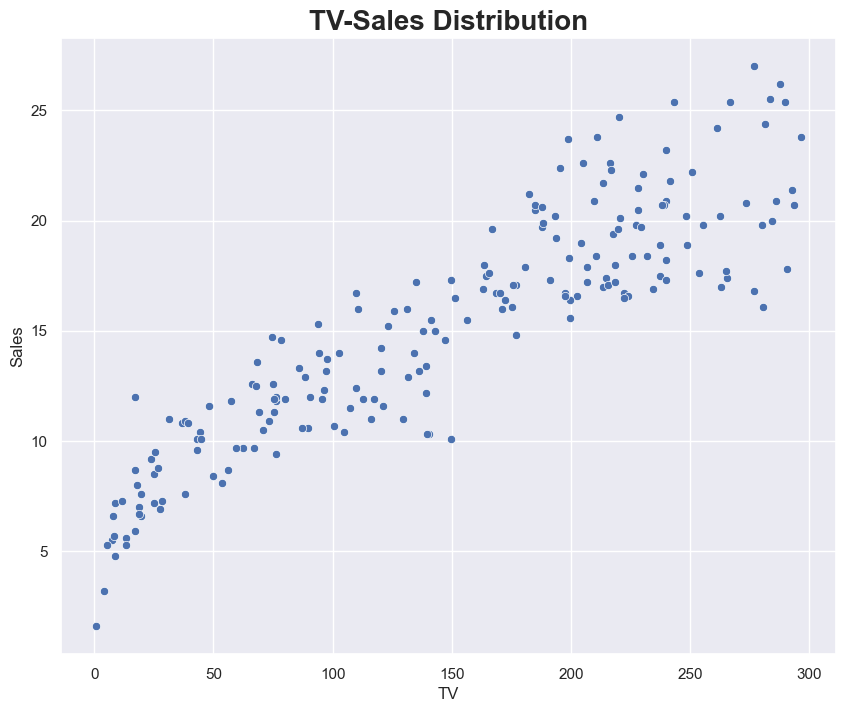

In [32]:
sns.set()
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['TV'],y=df['Sales'])
plt.title("TV-Sales Distribution",fontsize=20,fontweight='bold')
plt.show()

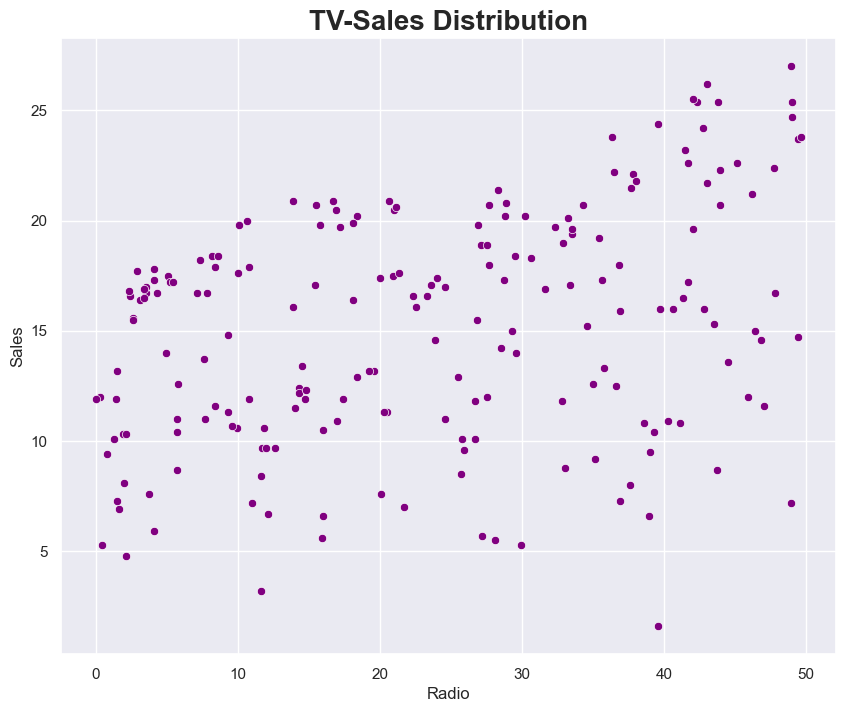

In [34]:
sns.set()
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['Radio'],y=df['Sales'],color='Purple')
plt.title("TV-Sales Distribution",fontsize=20,fontweight='bold')
plt.show()

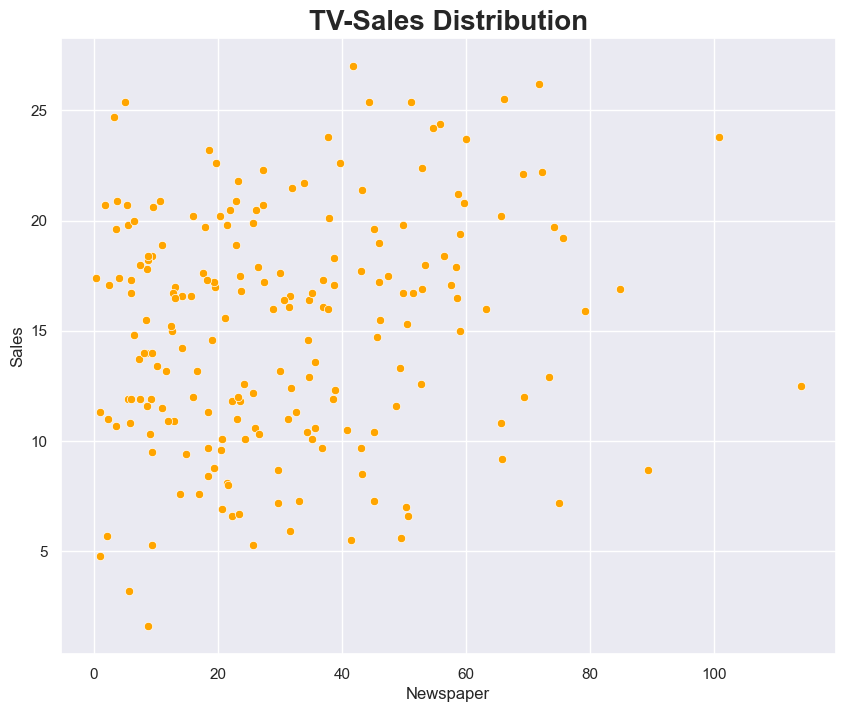

In [36]:
sns.set()
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['Newspaper'],y=df['Sales'],color='orange')
plt.title("TV-Sales Distribution",fontsize=20,fontweight='bold')
plt.show()

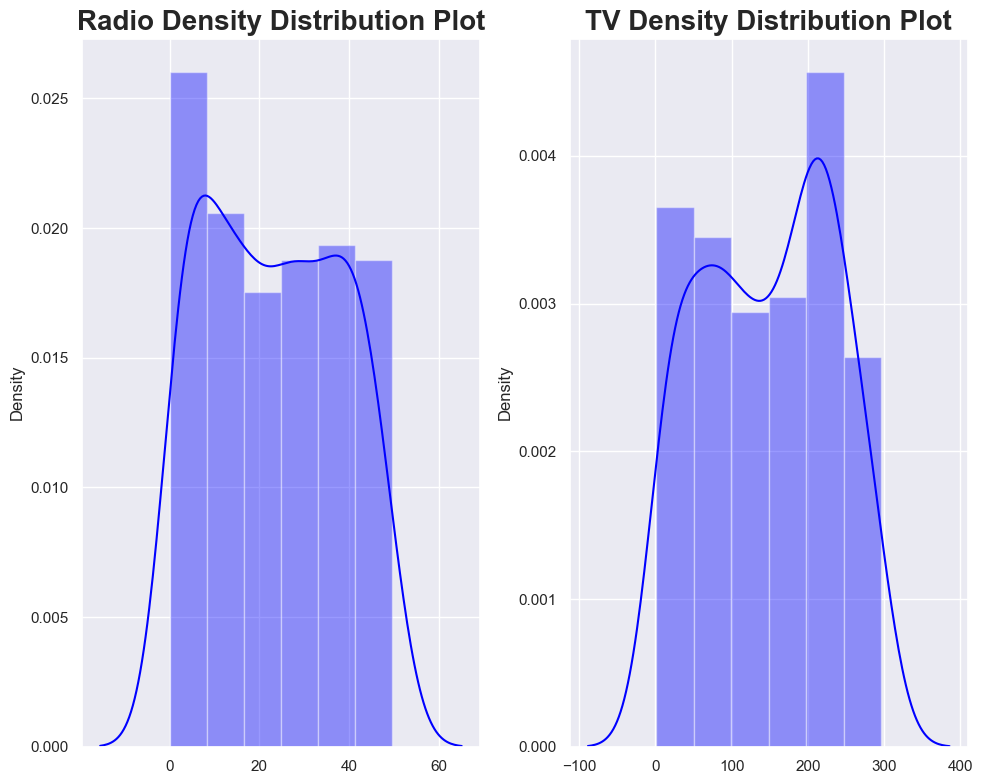

In [112]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.distplot(x=df['Radio'],color='Blue')
plt.title("Radio Density Distribution Plot",fontsize=20,fontweight='bold')
plt.subplot(1,2,2)
sns.distplot(x=df['TV'],color='blue')
plt.title("TV Density Distribution Plot",fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()

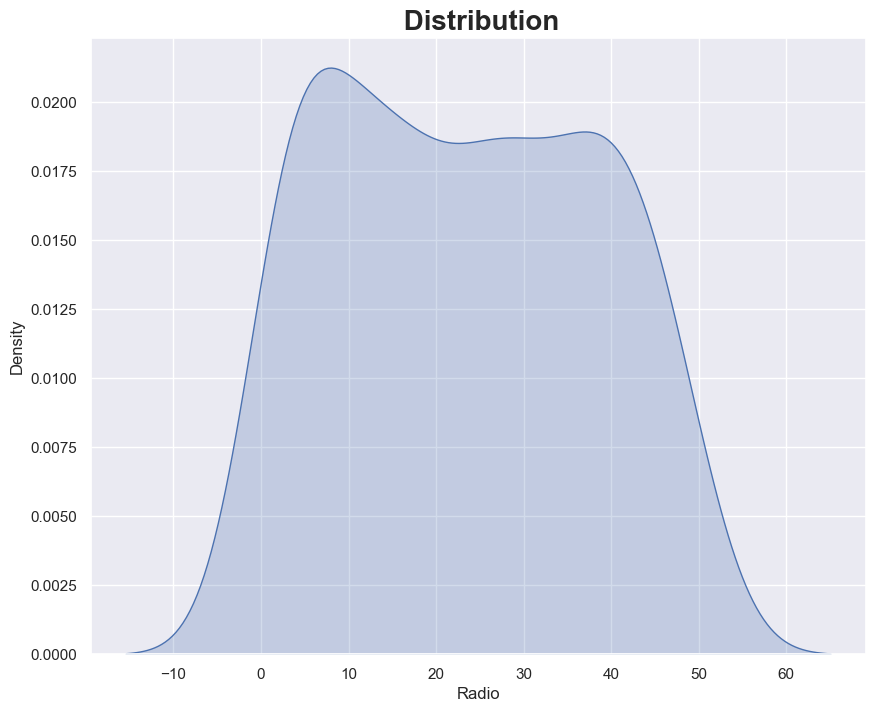

In [94]:
sns.set()
plt.figure(figsize=(10,8))
sns.kdeplot(x=df['Radio'],fill=True)
plt.title(" Distribution",fontsize=20,fontweight='bold')
plt.show()

# Splitting the Data

In [114]:
X=df[['TV','Radio',"Newspaper"]]
y=df['Sales']
print(X)
print(y)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]
0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2)

In [120]:
X_train.shape 

(160, 3)

In [122]:
y_test.shape

(40,)

# Applying Regression Model

In [126]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [128]:
y_pred=reg.predict(X_test)
y_pred

array([21.99062598, 20.31689745,  7.74073023, 17.1618269 , 18.35711599,
        9.8789229 , 19.28347487, 21.42653603,  8.74152257, 12.04757462,
       12.39511012, 16.90390217, 18.87488892, 10.68890142, 22.7718485 ,
        5.79622786,  5.0313161 , 19.27573934, 12.57310089,  9.71114274,
       17.34186469,  8.43098705, 13.21711523, 18.0097759 , 12.72759087,
        9.62611761,  6.86464202, 13.72636033, 18.96108718,  7.26841508,
       17.73736558, 10.50874064,  9.353908  , 12.26165932, 10.46048042,
       16.78146155, 10.06095927,  9.79964176, 18.13522851, 12.13056028])

In [132]:
reg.coef_

array([0.0548186 , 0.11519002, 0.00206182])

In [134]:
reg.intercept_

4.315915277229591

In [138]:
mse=mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
mae= mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:",mse)
print("Mean Abosulte Error:",mae)
print("R^2 Score:",r2)

Mean Squared Error: 2.746619466383593
Mean Abosulte Error: 1.2938612354454402
R^2 Score: 0.8761236965361654


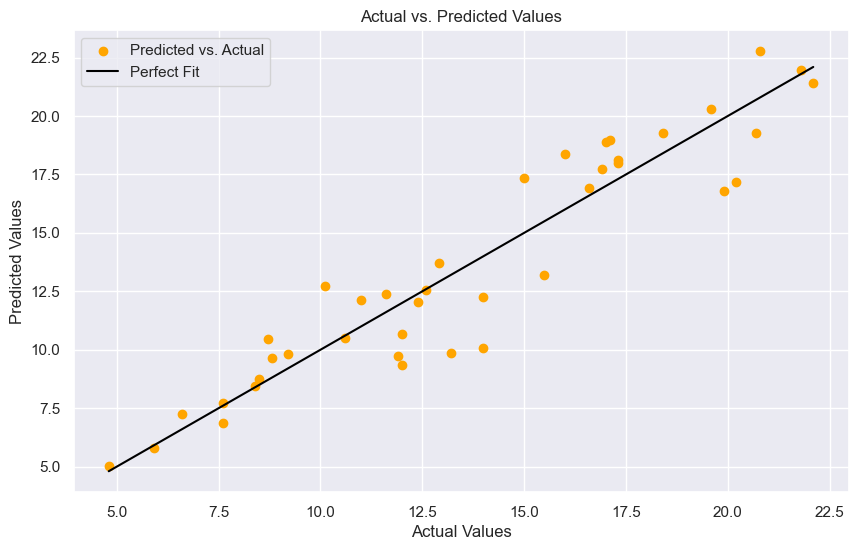

In [152]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='Orange', label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='-', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()